In [1]:
import os, shutil

base_dir = '/home/leafmonk/Documents/Cash Crop 10V1'
csv_dir = '/home/leafmonk/Documents/Cash Crop 10V1/img_csv'
org_img_dir = '/home/leafmonk/Documents/Cash Crop 10V1/img'

data_dir = os.path.join(base_dir, 'data')

train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')

In [2]:
import json

with open('/home/leafmonk/Documents/Cash Crop 10V1/data_dir_dict.json') as json_file: 
    data_dir = json.load(json_file) 

In [3]:
for name in data_dir.keys():
    print('Directories for:', name)
    
    for i in range(len(data_dir[name])):
        print(data_dir[name][i])
        
    print()

Directories for: hemlock
/home/leafmonk/Documents/Cash Crop 10V1/data/train/hemlock
/home/leafmonk/Documents/Cash Crop 10V1/data/validation/hemlock
/home/leafmonk/Documents/Cash Crop 10V1/data/test/hemlock

Directories for: rhododendron
/home/leafmonk/Documents/Cash Crop 10V1/data/train/rhododendron
/home/leafmonk/Documents/Cash Crop 10V1/data/validation/rhododendron
/home/leafmonk/Documents/Cash Crop 10V1/data/test/rhododendron

Directories for: poison oak
/home/leafmonk/Documents/Cash Crop 10V1/data/train/poison oak
/home/leafmonk/Documents/Cash Crop 10V1/data/validation/poison oak
/home/leafmonk/Documents/Cash Crop 10V1/data/test/poison oak

Directories for: lupine
/home/leafmonk/Documents/Cash Crop 10V1/data/train/lupine
/home/leafmonk/Documents/Cash Crop 10V1/data/validation/lupine
/home/leafmonk/Documents/Cash Crop 10V1/data/test/lupine

Directories for: bamboo
/home/leafmonk/Documents/Cash Crop 10V1/data/train/bamboo
/home/leafmonk/Documents/Cash Crop 10V1/data/validation/bamboo

In [4]:
for name in data_dir.keys():
    img_dir = os.path.join(org_img_dir, name)
    path, dirs, files = next(os.walk(img_dir))
    file_count = len(files)
    
    print('Total training', name, 'images:', len(os.listdir(data_dir[name][0])))
    print('Total validation', name, 'images:', len(os.listdir(data_dir[name][1])))
    print('Total test', name ,'images:', len(os.listdir(data_dir[name][2])))
    print('Total images', name, 'images:', file_count)
    print()

Total training hemlock images: 6400
Total validation hemlock images: 800
Total test hemlock images: 800
Total images hemlock images: 8000

Total training rhododendron images: 6400
Total validation rhododendron images: 800
Total test rhododendron images: 800
Total images rhododendron images: 8000

Total training poison oak images: 6391
Total validation poison oak images: 799
Total test poison oak images: 800
Total images poison oak images: 7995

Total training lupine images: 6392
Total validation lupine images: 800
Total test lupine images: 800
Total images lupine images: 7996

Total training bamboo images: 3538
Total validation bamboo images: 442
Total test bamboo images: 443
Total images bamboo images: 4424

Total training hydrangea images: 6003
Total validation hydrangea images: 750
Total test hydrangea images: 751
Total images hydrangea images: 7504

Total training poison ivy images: 6396
Total validation poison ivy images: 800
Total test poison ivy images: 800
Total images poison i

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
target_size = (299,299)
batch_size = 30
epochs = 100

In [27]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        color_mode = 'grayscale',
        batch_size=batch_size,
        class_mode='categorical')
        

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=target_size,
        color_mode = 'grayscale',
        batch_size=batch_size,
        class_mode='categorical')

Found 55772 images belonging to 10 classes.
Found 6973 images belonging to 10 classes.


In [28]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

In [29]:
base_model = InceptionResNetV2(include_top=False, weights = None, input_shape=(299,299,1))
base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 299, 299, 1) 0                                            
__________________________________________________________________________________________________
conv2d_609 (Conv2D)             (None, 149, 149, 32) 288         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_609 (BatchN (None, 149, 149, 32) 96          conv2d_609[0][0]                 
__________________________________________________________________________________________________
activation_609 (Activation)     (None, 149, 149, 32) 0           batch_normalization_609[0][0]    
________________________________________________________________________________

In [30]:
model = tf.keras.models.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')])

model.compile(loss='categorical_crossentropy',
        optimizer='SGD',
        metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 8, 8, 1536)        54336160  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1536)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1573888   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total params: 55,920,298
Trainable params: 55,859,754
Non-trainable params: 60,544
_________________________________________________________________


In [31]:
history = model.fit(
        train_generator,
        steps_per_epoch=batch_size,
        epochs=epochs,
        validation_data = validation_generator,
        validation_steps=batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 30 steps, validate for 30 steps
Epoch 1/100
30/30 [==============================] - 45s 2s/step - loss: 2.2498 - accuracy: 0.1422 - val_loss: 2.2816 - val_accuracy: 0.1078
Epoch 2/100
30/30 [==============================] - 29s 970ms/step - loss: 2.1607 - accuracy: 0.2044 - val_loss: 2.3261 - val_accuracy: 0.1078
Epoch 3/100
30/30 [==============================] - 28s 949ms/step - loss: 2.0927 - accuracy: 0.2444 - val_loss: 2.3821 - val_accuracy: 0.1078
Epoch 4/100
30/30 [==============================] - 29s 952ms/step - loss: 2.0482 - accuracy: 0.2378 - val_loss: 2.5675 - val_accuracy: 0.1078
Epoch 5/100
30/30 [==============================] - 28s 949ms/step - loss: 2.0291 - accuracy: 0.2467 - val_loss: 2.7233 - val_accuracy: 0.1078
Epoch 6/100
30/30 [==============================] - 29s 956ms/step - loss: 2.0060 - accuracy: 0.2711 - val_loss: 2.5529 - val_accuracy: 0.1078
Epoch 7/100
30/30 [============================

30/30 [==============================] - 29s 967ms/step - loss: 1.7242 - accuracy: 0.3911 - val_loss: 2.4748 - val_accuracy: 0.2978
Epoch 57/100
30/30 [==============================] - 29s 962ms/step - loss: 1.6544 - accuracy: 0.3944 - val_loss: 2.1536 - val_accuracy: 0.3033
Epoch 58/100
30/30 [==============================] - 29s 974ms/step - loss: 1.7152 - accuracy: 0.3811 - val_loss: 2.1056 - val_accuracy: 0.2900
Epoch 59/100
30/30 [==============================] - 29s 956ms/step - loss: 1.6813 - accuracy: 0.4100 - val_loss: 1.7718 - val_accuracy: 0.3611
Epoch 60/100
30/30 [==============================] - 29s 957ms/step - loss: 1.6069 - accuracy: 0.4311 - val_loss: 2.0704 - val_accuracy: 0.3400
Epoch 61/100
30/30 [==============================] - 29s 958ms/step - loss: 1.6804 - accuracy: 0.3911 - val_loss: 1.9151 - val_accuracy: 0.3356
Epoch 62/100
30/30 [==============================] - 29s 976ms/step - loss: 1.6342 - accuracy: 0.4133 - val_loss: 1.8849 - val_accuracy: 0.338

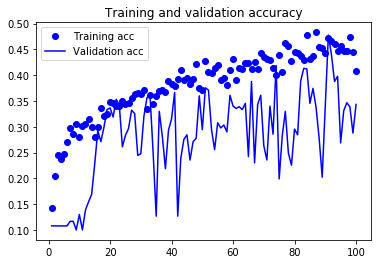

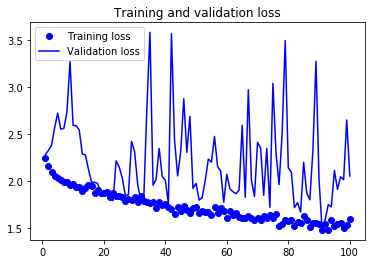

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

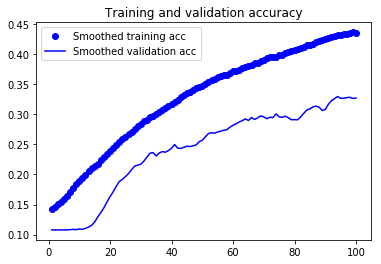

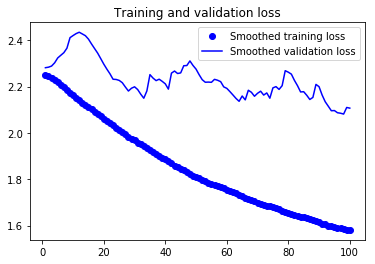

In [33]:
def smooth_curve(points, factor=0.95):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
        smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
        smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
        smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
        smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=target_size,
        batch_size=batch_size,
        color_mode = 'grayscale',
        class_mode='categorical')
test_loss, test_acc = model.evaluate(test_generator, steps=72)
print('test acc:', test_acc)

Found 6978 images belonging to 10 classes.
  ...
    to  
  ['...']
72/72 [==============================] - 17s 230ms/step - loss: 2.1509 - accuracy: 0.3264
test acc: 0.3263889


In [60]:
model.save('/home/leafmonk/Documents/Cash Crop 10V1/InceptionResNetV2/models/10V1_InceptionResNetV2_3.h5')

In [37]:
import os, shutil
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, grayscale = True, color_mode = 'grayscale', target_size=target_size )
    img_tensor = image.img_to_array(img)                  # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]
    
    img_rgb = image.load_img(img_path, target_size=target_size)
    img_rgb_tensor = image.img_to_array(img_rgb)                  # (height, width, channels)
    img_rgb_tensor = np.expand_dims(img_rgb_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_rgb_tensor /= 255
    
    if show:
        plt.imshow(img_rgb_tensor[0])                       
        plt.axis('off')
        plt.show()


    return img_tensor

In [58]:
def predict_plant(image_dir):
    img = load_image(image_dir, show = True)
    out = model.predict(img)
    index_top_1 = (np.where(out[0]==np.max(out[0])))
    out[0][index_top_1[0][0]] = 0
    index_top_2 = (np.where(out[0]==np.max(out[0])))
    print('Predicted top 1:', sorted(list(data_dir.keys()))[index_top_1[0][0]])
    print('Predicted top 2:', sorted(list(data_dir.keys()))[index_top_2[0][0]])
    
    return sorted(list(data_dir.keys()))[index_top_1[0][0]], sorted(list(data_dir.keys()))[index_top_2[0][0]]

--------------------------------------------------------------

OUT OF SAMPLE TESTING | RANDOM MANUAL SCRAPE FROM GOOGLE

--------------------------------------------------------------



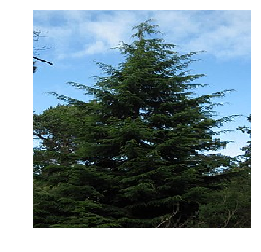

Predicted top 1: hemlock
Predicted top 2: bamboo
Top 1 was correct. Perfect.

Actual: hemlock

--------------------------------------------------------------



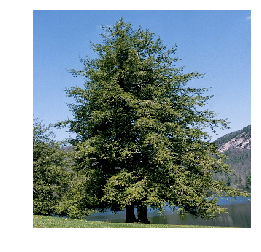

Predicted top 1: hemlock
Predicted top 2: bamboo
Top 1 was correct. Perfect.

Actual: hemlock

--------------------------------------------------------------



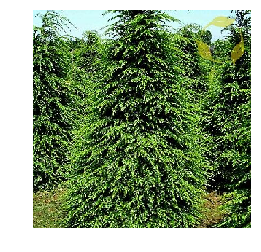

Predicted top 1: poison ivy
Predicted top 2: poison oak
LMAO ITS WRONG. GET OUT OF HERE

Actual: hemlock

--------------------------------------------------------------



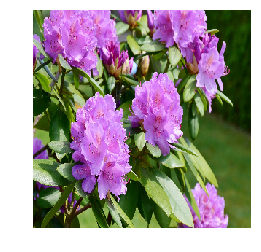

Predicted top 1: poison ivy
Predicted top 2: brambles
LMAO ITS WRONG. GET OUT OF HERE

Actual: rhododendron

--------------------------------------------------------------



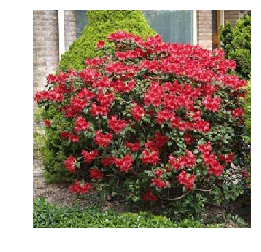

Predicted top 1: hemlock
Predicted top 2: rhododendron
Top 2 was correct. Close.

Actual: rhododendron

--------------------------------------------------------------



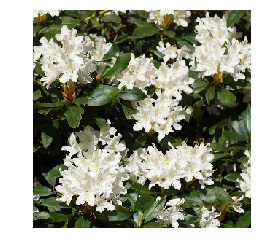

Predicted top 1: hydrangea
Predicted top 2: brambles
LMAO ITS WRONG. GET OUT OF HERE

Actual: rhododendron

--------------------------------------------------------------



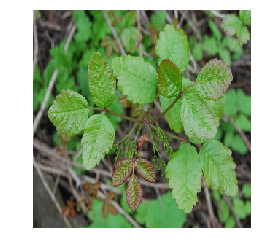

Predicted top 1: hemlock
Predicted top 2: poison ivy
LMAO ITS WRONG. GET OUT OF HERE

Actual: poison oak

--------------------------------------------------------------



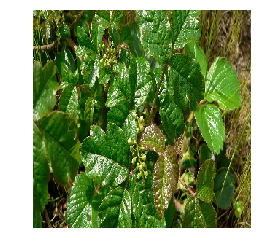

Predicted top 1: hemlock
Predicted top 2: poison ivy
LMAO ITS WRONG. GET OUT OF HERE

Actual: poison oak

--------------------------------------------------------------



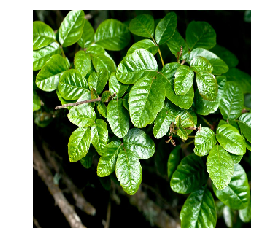

Predicted top 1: poison ivy
Predicted top 2: hemlock
LMAO ITS WRONG. GET OUT OF HERE

Actual: poison oak

--------------------------------------------------------------



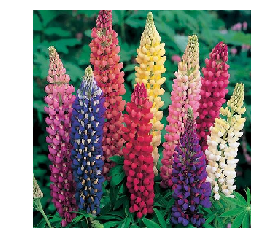

Predicted top 1: hemlock
Predicted top 2: poison ivy
LMAO ITS WRONG. GET OUT OF HERE

Actual: lupine

--------------------------------------------------------------



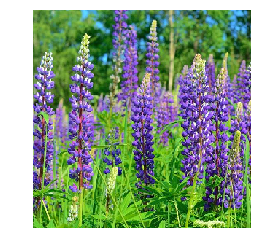

Predicted top 1: hemlock
Predicted top 2: poison ivy
LMAO ITS WRONG. GET OUT OF HERE

Actual: lupine

--------------------------------------------------------------



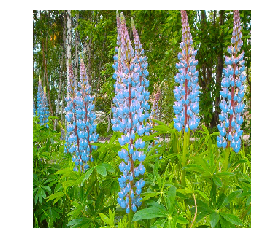

Predicted top 1: hemlock
Predicted top 2: poison ivy
LMAO ITS WRONG. GET OUT OF HERE

Actual: lupine

--------------------------------------------------------------



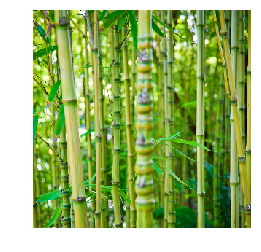

Predicted top 1: hemlock
Predicted top 2: poison ivy
LMAO ITS WRONG. GET OUT OF HERE

Actual: bamboo

--------------------------------------------------------------



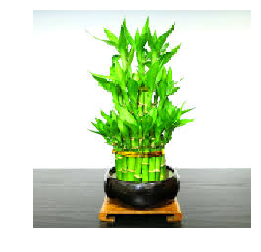

Predicted top 1: hemlock
Predicted top 2: cattail
LMAO ITS WRONG. GET OUT OF HERE

Actual: bamboo

--------------------------------------------------------------



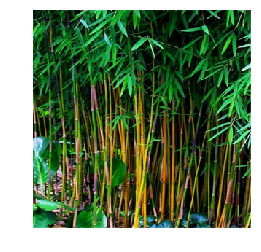

Predicted top 1: cattail
Predicted top 2: bamboo
Top 2 was correct. Close.

Actual: bamboo

--------------------------------------------------------------



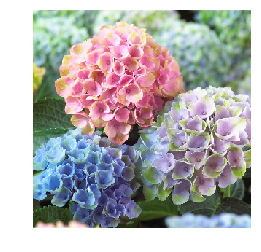

Predicted top 1: poison ivy
Predicted top 2: hydrangea
Top 2 was correct. Close.

Actual: hydrangea

--------------------------------------------------------------



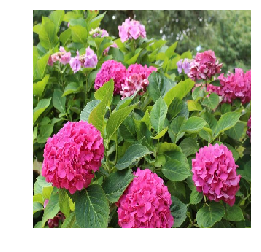

Predicted top 1: poison ivy
Predicted top 2: poison oak
LMAO ITS WRONG. GET OUT OF HERE

Actual: hydrangea

--------------------------------------------------------------



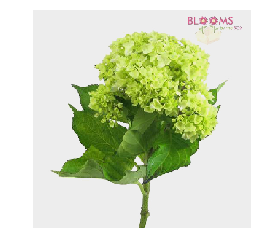

Predicted top 1: hemlock
Predicted top 2: hydrangea
Top 2 was correct. Close.

Actual: hydrangea

--------------------------------------------------------------



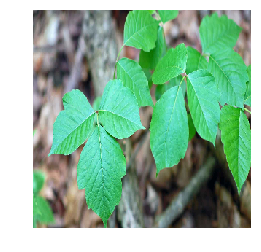

Predicted top 1: poison ivy
Predicted top 2: brambles
Top 1 was correct. Perfect.

Actual: poison ivy

--------------------------------------------------------------



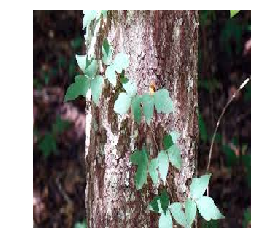

Predicted top 1: poison ivy
Predicted top 2: hemlock
Top 1 was correct. Perfect.

Actual: poison ivy

--------------------------------------------------------------



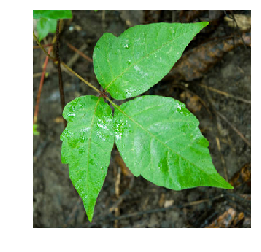

Predicted top 1: poison ivy
Predicted top 2: brambles
Top 1 was correct. Perfect.

Actual: poison ivy

--------------------------------------------------------------



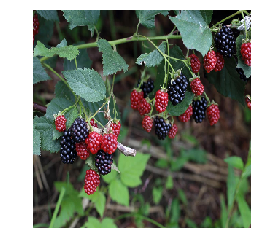

Predicted top 1: poison ivy
Predicted top 2: brambles
Top 2 was correct. Close.

Actual: brambles

--------------------------------------------------------------



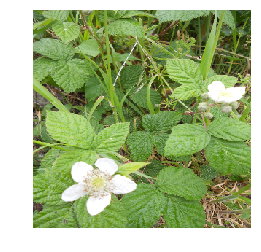

Predicted top 1: poison ivy
Predicted top 2: hemlock
LMAO ITS WRONG. GET OUT OF HERE

Actual: brambles

--------------------------------------------------------------



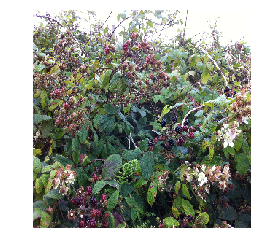

Predicted top 1: hemlock
Predicted top 2: poison ivy
LMAO ITS WRONG. GET OUT OF HERE

Actual: brambles

--------------------------------------------------------------



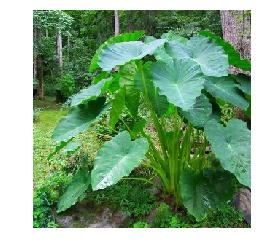

Predicted top 1: poison ivy
Predicted top 2: hydrangea
LMAO ITS WRONG. GET OUT OF HERE

Actual: elephant ear

--------------------------------------------------------------



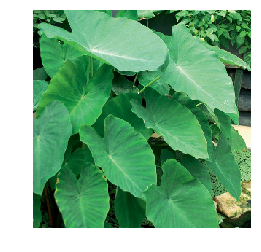

Predicted top 1: hydrangea
Predicted top 2: elephant ear
Top 2 was correct. Close.

Actual: elephant ear

--------------------------------------------------------------



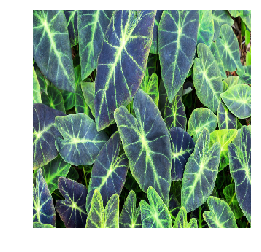

Predicted top 1: cattail
Predicted top 2: bamboo
LMAO ITS WRONG. GET OUT OF HERE

Actual: elephant ear

--------------------------------------------------------------



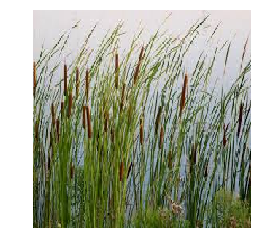

Predicted top 1: cattail
Predicted top 2: bamboo
Top 1 was correct. Perfect.

Actual: cattail

--------------------------------------------------------------



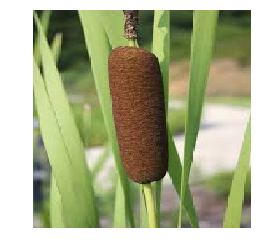

Predicted top 1: cattail
Predicted top 2: hemlock
Top 1 was correct. Perfect.

Actual: cattail

--------------------------------------------------------------



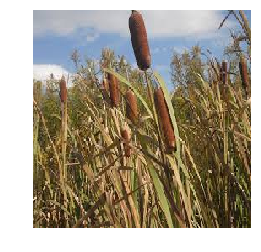

Predicted top 1: cattail
Predicted top 2: bamboo
Top 1 was correct. Perfect.

Actual: cattail

--------------------------------------------------------------

Number of new images: 30
Number of top 1 correct guesses: 8 	Percent: 26.666666666666668
Number of top 2 correct guesses: 6 	Percent: 20.0
Number of failed guesses: 16 	Percent: 53.333333333333336


In [59]:
print('--------------------------------------------------------------')
print()
print('OUT OF SAMPLE TESTING | RANDOM MANUAL SCRAPE FROM GOOGLE')
print()
print('--------------------------------------------------------------')
print()

num_new_img = 0
num_top_1 = 0
num_top_2 = 0
num_fail = 0

for name in data_dir.keys():   
    for i in range(1,4):
        
        num_new_img = num_new_img + 1
        img_name = name + '_' + str(i) + '.jpg'
        new_img = os.path.join('/home/leafmonk/Documents/Cash Crop 10V1/img_predict', img_name)
        top_1, top_2 = predict_plant(new_img)
        
        if top_1 == name:
            print('Top 1 was correct. Perfect.')
            num_top_1 = num_top_1 + 1
        elif top_2 == name:
            print('Top 2 was correct. Close.')
            num_top_2 = num_top_2 + 1
        else:
            print('LMAO ITS WRONG. GET OUT OF HERE')
            num_fail = num_fail + 1
            
        print()
        print('Actual:', name)
        print()
        print('--------------------------------------------------------------')
        print()
        
print('Number of new images:', num_new_img)
print('Number of top 1 correct guesses:', num_top_1, '\tPercent:', 100 * num_top_1/num_new_img)
print('Number of top 2 correct guesses:', num_top_2, '\tPercent:', 100 * num_top_2/num_new_img)
print('Number of failed guesses:', num_fail, '\tPercent:', 100 * num_fail/num_new_img)



In [ ]:
predict_plant('/home/leafmonk/Documents/Cash Crop 10V1/img_predict/brambles_5.jpg')